### 전체 데이터

#### 데이터 로드

In [92]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_prop)
plt.rcParams['axes.unicode_minus'] = False

In [93]:
csv_files = glob.glob(os.path.join('./original_data', '*.csv'))
df_list = [pd.read_csv(f, encoding='utf-8-sig') for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [94]:
df['개찰일시'] = pd.to_datetime(df['개찰일시'], format='%Y-%m-%d %H:%M', errors='coerce')
df = df.sort_values(by='개찰일시').reset_index(drop=True)

In [95]:
df[['대분류', '중분류']] = (df['카테고리'] .str.strip('[]') .str.split(' / ', expand=True))
df = df.rename(columns={'최저입찰가 (예정가격)(원)': '최저입찰가', '낙찰가(원)': '낙찰가'})
column_order = ['일련번호', '대분류', '중분류', '물건정보', '최저입찰가', '낙찰가', '입찰결과', '개찰일시']
df = df[column_order]
df['낙찰가'] = df['낙찰가'].replace('-', np.nan)
df['최저입찰가'] = df['최저입찰가'].replace('-', np.nan)

In [96]:
df

,일련번호,대분류,중분류,물건정보,최저입찰가,낙찰가,입찰결과,개찰일시
0,2014-1253-001750,광물/토사석,토사석,암버력,0,NaN,유찰,2015-01-02 09:00:00
1,2014-1251-001613,의류/가방/개인용품,신발,레베본 아동화,"133,000,000",NaN,유찰,2015-01-02 09:00:00
2,2014-1251-001613,의류/가방/개인용품,신발,레베본 아동화,"106,400,000",NaN,유찰,2015-01-02 09:00:00
3,2014-1251-001572,건축자재및기계,구축물,경일산업 미끄럼틀 외 4건,"350,000",NaN,유찰,2015-01-02 09:00:00
4,2014-1221-001623,자동차,소방및안전및인명구조차,"시슈사우루스 내폭화학차 1994년 14,032cc 자동","5,000,000","10,270,000",낙찰,2015-01-02 09:00:00
...,...,...,...,...,...,...,...,...
210214,2020-12270-001,유가증권,"유가증권(주식, 채권 등)",경기도 수원시 인계동 ****,"8,942,000",NaN,취소,2020-12-31 11:00:00
210215,2019-19255-001,유가증권,"유가증권(주식, 채권 등)",충청북도 음성군 대소면 ****,"29,037,000",NaN,유찰\n (해제),2020-12-31 11:00:00
210216,2020-1200-071854,미분류기타,미분류기타,'21-1차 불용장비 매각,비공개,"4,279,999,000",낙찰,2020-12-31 14:00:00
210217,2020-1200-068877,폐기물,폐기계및장비,Perkin-elmer 원자흡광분석기 US/Aanalyst800 등 4점,"15,282,400",NaN,유찰,2020-12-31 14:00:00


In [97]:
df.columns

Index(['일련번호', '대분류', '중분류', '물건정보', '최저입찰가', '낙찰가', '입찰결과', '개찰일시'], dtype='object')

#### 결측치

In [98]:
df.isnull().sum()

일련번호          0
대분류           0
중분류          86
물건정보          0
최저입찰가        16
낙찰가      116362
입찰결과          0
개찰일시          0
dtype: int64

In [99]:
df = df[(~df['최저입찰가'].isnull()) & (~df['중분류'].isnull())]
df = df[df['최저입찰가'] != '비공개']

In [100]:
df.isnull().sum()

일련번호         0
대분류          0
중분류          0
물건정보         0
최저입찰가        0
낙찰가      98865
입찰결과         0
개찰일시         0
dtype: int64

#### 분류

In [101]:
df['대분류'].value_counts()

대분류
자동차               53315
유가증권              26100
미분류기타              9335
기타기계기구             8688
기타권리및증권            7510
회원권                6207
임산물                6120
재활용품               6094
사무/가구/가전           5292
농/임/축산용기계          4073
산업기계               3896
폐기물                3434
컴퓨터/전기/통신기계        3290
측정/실험및의료장비         3052
선박                 2725
이륜차                2002
공구/제조부품/물품취급장비     1971
건축자재및기계            1416
기계설비               1369
기타서비스기계/물품         1290
농수축산물              1281
예술품/악기             1235
스포츠/레저              968
시계/귀금속              809
의류/가방/개인용품          776
중기                  723
교육시설/용품             700
인쇄,사진및시청각기기         557
광물/토사석              519
어업용기계               504
무형자산                470
피혁/섬유/직물            319
석유/화학/연료            312
철도                  274
식료품/의약품             239
회전기기및경전기            195
종이및출판물              174
판매권및광고권             135
공공안전/치안장비           110
산업위생                 80
중장비부품                72
NPL         

In [102]:
df[df['대분류'] == '자동차'].loc[:, '중분류'].value_counts()

중분류
승용차            15679
화물차            13620
승합차             9048
버스              4705
특수자동차           3149
기타차량            2943
소방및안전및인명구조차     2697
SUV             1379
자동차부품및보조용품        95
Name: count, dtype: int64

In [103]:
df[df['대분류'] == '유가증권'].loc[:, '중분류'].value_counts()

중분류
유가증권(주식, 채권 등)        26091
상품증권(선하증권, 창고증권 등)        7
기타화폐                      2
Name: count, dtype: int64

In [104]:
df[df['대분류'] == '기타기계기구'].loc[:, '중분류'].value_counts()

중분류
기타기계기구    8688
Name: count, dtype: int64

In [105]:
df[df['대분류'] == '사무/가구/가전'].loc[:, '중분류'].value_counts()

중분류
상업용주방용품및급식자재    2757
가전제품및디지털제품      1182
사무용기기            821
가구               404
사무용품             117
사무용소모품            11
Name: count, dtype: int64

In [106]:
df[df['대분류'] == '컴퓨터/전기/통신기계'].loc[:, '중분류'].value_counts()

중분류
컴퓨터및주변기기    1778
방송및영상장비      514
통신장비         365
서버및하드웨어      235
전자부품및소모품     227
조명및전기장비      171
Name: count, dtype: int64

#### 경매 횟수

In [107]:
date_counts = (df.groupby('일련번호')['개찰일시'].nunique().reset_index(name='unique_date_count'))

In [108]:
date_counts['unique_date_count'].value_counts()

unique_date_count
1     55340
2     15545
3      3273
4      2777
6      2074
5      1122
7      1031
12      809
8       414
9       202
11      139
10      127
14       85
15       79
13       57
18       52
17       37
24       21
20       20
16       20
30       18
23       17
19       17
28       16
29        8
43        8
22        7
26        7
25        6
27        5
34        5
36        5
45        4
44        4
40        3
41        3
63        3
35        3
42        3
56        3
21        2
47        2
37        2
32        2
31        2
48        2
49        2
55        2
62        2
52        1
50        1
59        1
46        1
60        1
33        1
66        1
Name: count, dtype: int64

<Axes: >

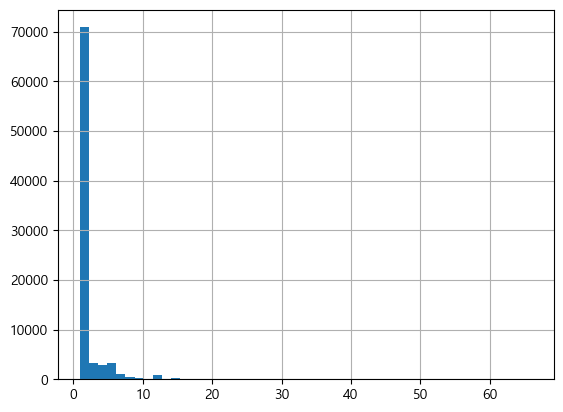

In [109]:
date_counts['unique_date_count'].hist(bins=50)

#### 낙찰 여부

In [110]:
df['입찰결과'].value_counts()

입찰결과
유찰                        78981
낙찰                        64849
취소                        14584
낙찰\n (낙찰후취소)               3944
유찰\n (수의계약가능)              1722
유찰\n (해제)                  1395
유찰\n (수의계약완료)              1111
유찰\n (유찰후 수의계약)             629
유찰\n (매매계약체결(수의))           172
현장입찰마감                      105
낙찰\n (해제)                    90
취소\n (해제)                    58
입회검사완료                       35
인터넷입찰마감                      23
낙찰\n (잔대금 납부 및 배분기일지정)       17
낙찰\n (우선매수)                  15
입회검사대기                       15
취소\n (유찰후 수의계약)               9
유찰\n (배분종결)                   8
낙찰\n (배분종결)                   8
유찰\n (매각완료(수의))               7
인터넷입찰마감\n (유찰후 수의계약)          4
유찰\n (우선매수)                   4
낙찰\n (차순위매각결정)                2
낙찰\n (유찰후 수의계약)               1
낙찰결정대기                        1
유찰\n (잔대금 납부 및 배분기일지정)        1
Name: count, dtype: int64

In [111]:
df.loc[:, '입찰결과'] = df['입찰결과'].str.replace(r'\n', '', regex=True)
df.loc[:, '입찰결과'] = df['입찰결과'].replace({'낙찰 (낙찰후취소)': '낙찰', '유찰 (유찰후 수의계약)': '유찰', '유찰 (해제)': '유찰'})
df = df[(df['입찰결과'] == '낙찰') | (df['입찰결과'] == '유찰')].copy()
df.loc[:, '입찰결과'] = df['입찰결과'].apply(lambda x: 1 if x == '낙찰' else 0).astype(int)
df = df.rename(columns={'입찰결과': '낙찰여부'})

In [112]:
df

,일련번호,대분류,중분류,물건정보,최저입찰가,낙찰가,낙찰여부,개찰일시
0,2014-1253-001750,광물/토사석,토사석,암버력,0,NaN,0,2015-01-02 09:00:00
1,2014-1251-001613,의류/가방/개인용품,신발,레베본 아동화,"133,000,000",NaN,0,2015-01-02 09:00:00
2,2014-1251-001613,의류/가방/개인용품,신발,레베본 아동화,"106,400,000",NaN,0,2015-01-02 09:00:00
3,2014-1251-001572,건축자재및기계,구축물,경일산업 미끄럼틀 외 4건,"350,000",NaN,0,2015-01-02 09:00:00
4,2014-1221-001623,자동차,소방및안전및인명구조차,"시슈사우루스 내폭화학차 1994년 14,032cc 자동","5,000,000","10,270,000",1,2015-01-02 09:00:00
...,...,...,...,...,...,...,...,...
210212,2020-12581-001,유가증권,"유가증권(주식, 채권 등)",대구광역시 수성구 수성동3가 ****,"1,518,000",NaN,0,2020-12-31 11:00:00
210213,2020-12582-001,유가증권,"유가증권(주식, 채권 등)",대구광역시 수성구 수성동3가 ****,"6,520,000",NaN,0,2020-12-31 11:00:00
210215,2019-19255-001,유가증권,"유가증권(주식, 채권 등)",충청북도 음성군 대소면 ****,"29,037,000",NaN,0,2020-12-31 11:00:00
210217,2020-1200-068877,폐기물,폐기계및장비,Perkin-elmer 원자흡광분석기 US/Aanalyst800 등 4점,"15,282,400",NaN,0,2020-12-31 14:00:00


### 자동차

#### 추출

In [113]:
car = df[df['대분류'] == '자동차'].copy()

In [114]:
car

,일련번호,대분류,중분류,물건정보,최저입찰가,낙찰가,낙찰여부,개찰일시
4,2014-1221-001623,자동차,소방및안전및인명구조차,"시슈사우루스 내폭화학차 1994년 14,032cc 자동","5,000,000","10,270,000",1,2015-01-02 09:00:00
5,2014-1221-001376,자동차,화물차,"현대자동차 신정10m3 급진공노면청소차 2005년 12,344cc 확인불가","41,600,000",NaN,0,2015-01-02 09:00:00
8,2014-1121-001079,자동차,버스,"대우자동차 대우고속버스 2001년 14,618cc 수동","4,375,000","4,420,000",1,2015-01-02 10:00:00
17,2014-1222-001620,자동차,승합차,"기아자동차 봉고Ⅲ코치 2004년 3,000cc 수동","7,000,000","7,883,000",1,2015-01-02 10:00:00
43,2014-1121-001293,자동차,승합차,"현대자동차 스타렉스 2004년월 2,497cc 자동 외 2건","6,202,400",NaN,0,2015-01-02 11:00:00
...,...,...,...,...,...,...,...,...
210110,2020-1200-071692,자동차,SUV,기아자동차 중형 승용 SUV 스포티지 1991cc,"1,337,700","2,722,900",1,2020-12-31 10:00:00
210148,2020-1200-071866,자동차,승용차,기아자동차 소형 승용 모닝 999cc,"800,000","2,550,000",1,2020-12-31 11:00:00
210149,2020-1200-071867,자동차,승용차,기아자동차 중형 승용 로체 1798cc,"800,000","1,051,000",1,2020-12-31 11:00:00
210156,2020-01108-001,자동차,승용차,인천광역시 동구 창영동 ****,"1,500,000",NaN,0,2020-12-31 11:00:00


In [115]:
car['중분류'].value_counts()

중분류
승용차            14336
화물차            12792
승합차             8502
버스              4395
특수자동차           2901
소방및안전및인명구조차     2564
기타차량            2118
SUV             1303
자동차부품및보조용품        89
Name: count, dtype: int64

In [116]:
print(car)

                    일련번호  대분류          중분류  \
4       2014-1221-001623  자동차  소방및안전및인명구조차   
5       2014-1221-001376  자동차          화물차   
8       2014-1121-001079  자동차           버스   
17      2014-1222-001620  자동차          승합차   
43      2014-1121-001293  자동차          승합차   
...                  ...  ...          ...   
210110  2020-1200-071692  자동차          SUV   
210148  2020-1200-071866  자동차          승용차   
210149  2020-1200-071867  자동차          승용차   
210156    2020-01108-001  자동차          승용차   
210160    2020-05708-001  자동차         기타차량   

                                             물건정보       최저입찰가         낙찰가  \
4                  시슈사우루스 내폭화학차 1994년 14,032cc 자동   5,000,000  10,270,000   
5       현대자동차 신정10m3 급진공노면청소차 2005년 12,344cc 확인불가  41,600,000         NaN   
8                  대우자동차 대우고속버스 2001년 14,618cc 수동   4,375,000   4,420,000   
17                   기아자동차 봉고Ⅲ코치 2004년 3,000cc 수동   7,000,000   7,883,000   
43              현대자동차 스타렉스 2004년월 2,497cc 자동 외 2건   6,202,400 

#### 낙찰가 이상 필터링

In [117]:
# 낙찰가가 2개 이상 존재하는 일련번호 필터링
multiple_bid_serials = car.groupby("일련번호")["낙찰가"].apply(lambda x: x.notna().sum())
multiple_bid_serials = multiple_bid_serials[multiple_bid_serials > 1]
duplicates = car[car["일련번호"].isin(multiple_bid_serials.index)].sort_values(by=["일련번호", "개찰일시"])

print(f"낙찰가가 2개 이상 존재하는 일련번호 수: {len(multiple_bid_serials)}")
duplicates

낙찰가가 2개 이상 존재하는 일련번호 수: 1831


,일련번호,대분류,중분류,물건정보,최저입찰가,낙찰가,낙찰여부,개찰일시
36349,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","5,000,000","5,170,000",1,2016-01-21 11:00:00
45845,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","5,000,000",NaN,0,2016-06-02 11:00:00
46272,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","4,500,000",NaN,0,2016-06-09 11:00:00
46801,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","4,000,000",NaN,0,2016-06-16 11:00:00
47445,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","3,500,000",NaN,0,2016-06-23 11:00:00
...,...,...,...,...,...,...,...,...
106289,TX_0405343120180125000445,자동차,버스,현대자동차(주) 대형 승합 뉴슈퍼에어로시티 11149cc,"6,306,900",NaN,0,2018-02-21 10:00:00
107837,TX_0405343120180125000445,자동차,버스,현대자동차(주) 대형 승합 뉴슈퍼에어로시티 11149cc,"5,676,210",NaN,0,2018-03-14 10:00:00
108800,TX_0405343120180125000445,자동차,버스,현대자동차(주) 대형 승합 뉴슈퍼에어로시티 11149cc,"5,045,520","5,511,000",1,2018-03-23 10:00:00
91543,TX_0405986220170919002116,자동차,화물차,"호퍼트럭, 기아, 사료운반차 5톤 라이노","4,000,000","4,620,000",1,2017-09-27 10:00:00


In [118]:
duplicates[duplicates['낙찰여부'] == 1]

,일련번호,대분류,중분류,물건정보,최저입찰가,낙찰가,낙찰여부,개찰일시
36349,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","5,000,000","5,170,000",1,2016-01-21 11:00:00
48820,2015-14496-001,자동차,승용차,"강원 홍천군,홍천군 홍천읍 ****","2,500,000","2,610,000",1,2016-07-07 11:00:00
41123,2015-18806-001,자동차,승용차,창원시 마산회원구 양덕동 ****,"1,000,000","1,036,900",1,2016-03-31 11:00:00
52380,2015-18806-001,자동차,승용차,창원시 마산회원구 양덕동 ****,"900,000","970,000",1,2016-08-11 11:00:00
41625,2016-00562-001,자동차,승용차,대구 북구 금호동 ****,"5,000,000","5,111,000",1,2016-04-07 11:00:00
...,...,...,...,...,...,...,...,...
197336,TX_0404555820200812000988,자동차,승용차,관용차량(K5),"5,317,900","7,510,000",1,2020-09-07 10:00:00
104912,TX_0405343120180125000445,자동차,버스,현대자동차(주) 대형 승합 뉴슈퍼에어로시티 11149cc,"6,306,900","6,950,000",1,2018-02-02 10:00:00
108800,TX_0405343120180125000445,자동차,버스,현대자동차(주) 대형 승합 뉴슈퍼에어로시티 11149cc,"5,045,520","5,511,000",1,2018-03-23 10:00:00
91543,TX_0405986220170919002116,자동차,화물차,"호퍼트럭, 기아, 사료운반차 5톤 라이노","4,000,000","4,620,000",1,2017-09-27 10:00:00


In [119]:
multiple_bid_serials = car.groupby("일련번호")["낙찰가"].apply(lambda x: x.notna().sum())
multiple_bid_serials = multiple_bid_serials[multiple_bid_serials > 1].index
car = car[~car["일련번호"].isin(multiple_bid_serials)].copy()

In [120]:
car

,일련번호,대분류,중분류,물건정보,최저입찰가,낙찰가,낙찰여부,개찰일시
4,2014-1221-001623,자동차,소방및안전및인명구조차,"시슈사우루스 내폭화학차 1994년 14,032cc 자동","5,000,000","10,270,000",1,2015-01-02 09:00:00
5,2014-1221-001376,자동차,화물차,"현대자동차 신정10m3 급진공노면청소차 2005년 12,344cc 확인불가","41,600,000",NaN,0,2015-01-02 09:00:00
8,2014-1121-001079,자동차,버스,"대우자동차 대우고속버스 2001년 14,618cc 수동","4,375,000","4,420,000",1,2015-01-02 10:00:00
17,2014-1222-001620,자동차,승합차,"기아자동차 봉고Ⅲ코치 2004년 3,000cc 수동","7,000,000","7,883,000",1,2015-01-02 10:00:00
43,2014-1121-001293,자동차,승합차,"현대자동차 스타렉스 2004년월 2,497cc 자동 외 2건","6,202,400",NaN,0,2015-01-02 11:00:00
...,...,...,...,...,...,...,...,...
210109,2020-1000-061890,자동차,소방및안전및인명구조차,"(주)성우모터스 중형 승합 SW-14AMB-002 2,497cc 그랜드스타렉스일반구급차","9,000,000",NaN,0,2020-12-31 10:00:00
210110,2020-1200-071692,자동차,SUV,기아자동차 중형 승용 SUV 스포티지 1991cc,"1,337,700","2,722,900",1,2020-12-31 10:00:00
210148,2020-1200-071866,자동차,승용차,기아자동차 소형 승용 모닝 999cc,"800,000","2,550,000",1,2020-12-31 11:00:00
210149,2020-1200-071867,자동차,승용차,기아자동차 중형 승용 로체 1798cc,"800,000","1,051,000",1,2020-12-31 11:00:00


In [121]:
car['일련번호'].value_counts()

일련번호
2018-12456-001      17
2018-08204-001      15
2017-0300-013870    14
2016-1000-026442    14
2020-0300-010036    13
                    ..
2017-0400-016641     1
2017-0500-019904     1
2017-0500-019708     1
2017-0500-019583     1
2020-1200-071867     1
Name: count, Length: 31140, dtype: int64

#### 변형

In [122]:
car["최저입찰가"] = car["최저입찰가"].replace(",", "", regex=True).astype(float)
car["낙찰가"] = car["낙찰가"].replace(",", "", regex=True).astype(float)
car["낙찰여부"] = car["낙찰여부"].astype(int)

In [123]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43741 entries, 4 to 210156
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일련번호    43741 non-null  object        
 1   대분류     43741 non-null  object        
 2   중분류     43741 non-null  object        
 3   물건정보    43741 non-null  object        
 4   최저입찰가   43741 non-null  float64       
 5   낙찰가     28548 non-null  float64       
 6   낙찰여부    43741 non-null  int32         
 7   개찰일시    43741 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 2.8+ MB


In [124]:
import pandas as pd
from datetime import timedelta
import numpy as np

def group_data(df: pd.DataFrame, max_rounds: int = 3, reference_date: pd.Timestamp = None) -> pd.DataFrame:
    if reference_date is None:
        reference_date = pd.Timestamp.today()

    one_month_ago = reference_date - timedelta(days=30)

    # 최근 1달 내 개찰된 일련번호
    recent_items = df[df["개찰일시"] >= one_month_ago]["일련번호"].unique()

    # 낙찰가 없는 건 중 최근 등장한 것 제외
    no_bid = df[df["낙찰가"].isna()]
    final_unsold = no_bid[~no_bid["일련번호"].isin(recent_items)]["일련번호"].unique()

    # 낙찰된 건
    successful_bids = df[df["낙찰가"].notna()]["일련번호"].unique()

    def aggregate_group(group):
        group = group.sort_values("개찰일시").reset_index(drop=True)

        row = {
            "일련번호": group.loc[0, "일련번호"],
            "대분류": group.loc[0, "대분류"],
            "중분류": group.loc[0, "중분류"],
            "물건정보": group.loc[0, "물건정보"],
            "낙찰가": group["낙찰가"].dropna().unique()[0] if group["낙찰가"].notna().any() else pd.NA,
        }

        bid_ended = False
        bid_prices = []

        row["최초입찰시기"] = group["개찰일시"].min()

        bid_success_row = group[group["낙찰여부"] == 1]
        if not bid_success_row.empty:
            row["낙찰개찰일시"] = bid_success_row["개찰일시"].values[0]
            row["낙찰차수"] = bid_success_row.index[0] + 1
        else:
            row["낙찰개찰일시"] = pd.NaT
            row["낙찰차수"] = pd.NA

        for _, r in group.iterrows():
            if bid_ended:
                bid_prices.append(pd.NA)
                continue
            bid_prices.append(r["최저입찰가"])
            if r["낙찰여부"] == 1:
                bid_ended = True

        for i in range(max_rounds):
            col_name = f"{i+1}차최저입찰가"
            row[col_name] = bid_prices[i] if i < len(bid_prices) else pd.NA

        row["최종최저입찰가"] = next((p for p in reversed(bid_prices) if pd.notna(p)), pd.NA)

        if row["일련번호"] in successful_bids:
            row["최종유찰여부"] = 0
        elif row["일련번호"] in final_unsold:
            row["최종유찰여부"] = 1
        else:
            return None

        # 낙찰가율 계산
        낙찰가 = row["낙찰가"]
        최초최저 = row.get("1차최저입찰가")
        최종최저 = row.get("최종최저입찰가")

        def calc_rate(nak, bid):
            if pd.isna(nak) or pd.isna(bid):
                return pd.NA
            if bid == 0:
                return np.inf
            return nak / bid * 100

        row["낙찰가율_최초최저가기준"] = calc_rate(낙찰가, 최초최저)
        row["낙찰가율_최종최저가기준"] = calc_rate(낙찰가, 최종최저)

        return row

    # 그룹 적용
    result = df.groupby("일련번호").apply(aggregate_group).dropna().apply(pd.Series)
    result = result.reset_index(drop=True)

    # 명시적 타입 변환
    float_cols = [
        "낙찰가", "1차최저입찰가", "2차최저입찰가", "3차최저입찰가", "4차최저입찰가", "5차최저입찰가",
        "최종최저입찰가", "낙찰가율_최초최저가기준", "낙찰가율_최종최저가기준"
    ]
    for col in float_cols:
        if col in result.columns:
            result[col] = pd.to_numeric(result[col], errors='coerce')

    if "낙찰차수" in result.columns:
        result["낙찰차수"] = pd.to_numeric(result["낙찰차수"], errors='coerce')

    if "낙찰개찰일시" in result.columns:
        result["낙찰개찰일시"] = pd.to_datetime(result["낙찰개찰일시"], errors='coerce')

    return result

In [125]:
car = group_data(car, max_rounds=5, reference_date=pd.Timestamp("2020-12-31"))

C:\Users\hwang\AppData\Local\Temp\ipykernel_34040\2425695415.py:84: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby("일련번호").apply(aggregate_group).dropna().apply(pd.Series)


In [126]:
car

,일련번호,대분류,중분류,물건정보,낙찰가,최초입찰시기,낙찰개찰일시,낙찰차수,1차최저입찰가,2차최저입찰가,3차최저입찰가,4차최저입찰가,5차최저입찰가,최종최저입찰가,최종유찰여부,낙찰가율_최초최저가기준,낙찰가율_최종최저가기준
0,2013-07508-003,자동차,승용차,경북 구미시 공단동 ****,31050000.0,2016-05-06 11:00:00,2016-05-06 11:00:00,1.0,27000000.0,NaN,NaN,NaN,NaN,27000000.0,0,115.000000,115.000000
1,2013-11625-014,자동차,승용차,경상북도 영주시 가흥동 ****,2670000.0,2017-08-10 11:00:00,2017-09-07 11:00:00,5.0,2500000.0,2250000.0,2000000.0,1750000.0,1500000.0,1500000.0,0,106.800000,178.000000
2,2013-11625-015,자동차,승용차,경상북도 영주시 가흥동 ****,6510000.0,2017-08-10 11:00:00,2017-08-31 11:00:00,4.0,8000000.0,7200000.0,6400000.0,5600000.0,NaN,5600000.0,0,81.375000,116.250000
3,2013-11625-016,자동차,승용차,경상북도 영주시 가흥동 ****,14500000.0,2017-08-10 11:00:00,2017-08-10 11:00:00,1.0,14000000.0,NaN,NaN,NaN,NaN,14000000.0,0,103.571429,103.571429
4,2013-13532-001,자동차,승용차,"경기 연천군,연천군 연천읍 ****",1010000.0,2015-02-05 11:00:00,2015-02-05 11:00:00,1.0,500000.0,NaN,NaN,NaN,NaN,500000.0,0,202.000000,202.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31075,TX_0412425320161014000281,자동차,버스,현대 뉴 슈퍼에어로시티 46인승,6210000.0,2016-10-24 11:00:00,2016-10-24 11:00:00,1.0,5500000.0,NaN,NaN,NaN,NaN,5500000.0,0,112.909091,112.909091
31076,TX_0414680820200316000257,자동차,승합차,현대자동차 중형승합 이-카운티 3933cc 15인승,20610000.0,2020-03-31 10:00:00,2020-03-31 10:00:00,1.0,12000000.0,NaN,NaN,NaN,NaN,12000000.0,0,171.750000,171.750000
31077,TX_0418535220180514000760,자동차,승합차,"소형승합차, 현대, 스타렉스JUMBO, 터보인터쿨러 12인승 2WD GRX 일반형(...",2114000.0,2018-05-25 11:00:00,2018-05-25 11:00:00,1.0,2000000.0,NaN,NaN,NaN,NaN,2000000.0,0,105.700000,105.700000
31078,TX_0418747920181126000203,자동차,승합차,"경형승합차, 지엠대우, 2006년형뉴다마스ll 코치(LPG) 5인승 DLX, M/T...",3106000.0,2018-12-10 09:00:00,2018-12-10 09:00:00,1.0,800000.0,NaN,NaN,NaN,NaN,800000.0,0,388.250000,388.250000


#### 이상치 제거

In [127]:
car[car['낙찰가율_최종최저가기준'] >= 1000].shape

(123, 17)

In [128]:
car[car['낙찰가율_최초최저가기준'] >= 1000].shape

(131, 17)

In [129]:
car = car[car['낙찰가율_최초최저가기준'] < 1000]

In [130]:
car = car[car['낙찰가율_최종최저가기준'] < 1000]

#### 저장

In [131]:
car.to_pickle("train.pkl")